In [440]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

## Reine Daten

In [441]:
df_raw = pd.read_csv('kredit.csv')

In [442]:
df = df_raw.copy(deep=True)

In [443]:
df['zahlung pro monat'] = df['hoehe'] / df['laufzeit']

In [444]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,180.916667


In [445]:
X = df.drop('kredit', axis=1)

In [446]:
y = df['kredit']

In [447]:
####### Für Skalierung bis hier, zu 2 Version #######

In [448]:
from sklearn.model_selection import train_test_split

In [449]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)

In [450]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

## Version 

- nicht skaliert werden
- das Parameter nicht optimiert werden

### Logit

In [410]:
len(X_train)

700

In [411]:
len(X_eval)

150

In [412]:
len(X_test)

150

In [413]:
from sklearn.linear_model import LogisticRegression

logit_base = LogisticRegression()

In [414]:
logit_base.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [418]:
# testen mit Evaluation

y_eval_pred = logit_base.predict(X_eval)
y_eval_pred_proba = logit_base.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = logit_base.predict(X_train)
y_train_proba = logit_base.predict_proba(X_train)[:, 1]

In [421]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))

0.8022875816993464
0.831858407079646
0.7466666666666667


In [422]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))


0.7837515634771732
0.8444863336475023
0.7642857142857142


In [24]:
# report mit test

y_final_test_pred = logit_base.predict(X_test)

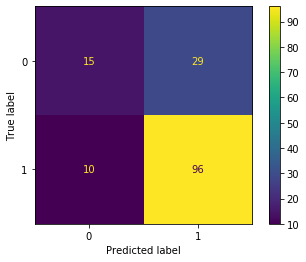

In [26]:
plot_confusion_matrix(logit_base, X_test, y_test)

In [28]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.34      0.43        44
           1       0.77      0.91      0.83       106

    accuracy                           0.74       150
   macro avg       0.68      0.62      0.63       150
weighted avg       0.72      0.74      0.71       150



In [31]:
y_final_test_pred_proba = logit_base.predict_proba(X_test)[:, 1]

In [32]:
roc_auc_score(y_test, y_final_test_pred_proba)


0.7575042881646656

### K-Nearest Neighbors

In [434]:
from sklearn.neighbors import KNeighborsClassifier

In [435]:
knn_base = KNeighborsClassifier()

In [436]:
knn_base.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [437]:
# testen mit Evaluation

y_eval_pred = knn_base.predict(X_eval)
y_eval_pred_proba = knn_base.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = knn_base.predict(X_train)
y_train_proba = knn_base.predict_proba(X_train)[:, 1]

In [438]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))

0.6030433006535947
0.7947598253275109
0.6866666666666666


In [439]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))


0.8156758130081301
0.8460076045627376
0.7685714285714286


In [36]:
accuracy_score(y_eval, y_eval_pred)

0.6866666666666666

In [37]:
# report

y_final_test_pred = knn_base.predict(X_test)

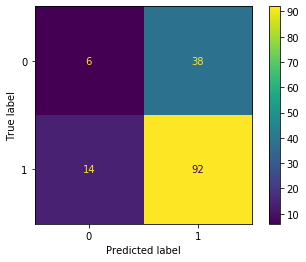

In [38]:
plot_confusion_matrix(knn_base, X_test, y_test)

In [53]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.30      0.14      0.19        44
           1       0.71      0.87      0.78       106

    accuracy                           0.65       150
   macro avg       0.50      0.50      0.48       150
weighted avg       0.59      0.65      0.61       150



In [54]:
y_final_test_pred_proba = knn_base.predict_proba(X_test)[:, 1]

In [55]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.5266938250428816

### SVM

In [451]:
from sklearn.svm import SVC

In [452]:
svm_base = SVC(kernel='linear',probability= True)

In [453]:
svm_base.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [454]:
# testen mit Evaluation

y_eval_pred =svm_base.predict(X_eval)
y_eval_pred_proba = svm_base.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = svm_base.predict(X_train)
y_train_proba = svm_base.predict_proba(X_train)[:, 1]

In [455]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))

0.7602124183006537
0.8019323671497584
0.7266666666666667


In [456]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))


0.7663090212632895
0.8221343873517788
0.7428571428571429


In [16]:
accuracy_score(y_eval, y_eval_pred)

0.7266666666666667

In [17]:
# report

y_final_test_pred = svm_base.predict(X_test)

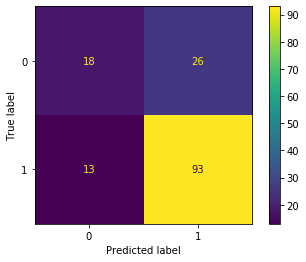

In [18]:
plot_confusion_matrix(svm_base, X_test, y_test)

In [19]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.41      0.48        44
           1       0.78      0.88      0.83       106

    accuracy                           0.74       150
   macro avg       0.68      0.64      0.65       150
weighted avg       0.72      0.74      0.72       150



In [20]:
y_final_test_pred_proba = svm_base.predict_proba(X_test)[:, 1]

In [21]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.7266295025728987

## Version

- numerisch Features skaliert werden

In [377]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [378]:
X_num

array([[1.80000000e+01, 1.04900000e+03, 2.10000000e+01, 5.82777778e+01],
       [9.00000000e+00, 2.79900000e+03, 3.60000000e+01, 3.11000000e+02],
       [1.20000000e+01, 8.41000000e+02, 2.30000000e+01, 7.00833333e+01],
       ...,
       [2.10000000e+01, 1.26800000e+04, 3.00000000e+01, 6.03809524e+02],
       [1.20000000e+01, 6.46800000e+03, 5.20000000e+01, 5.39000000e+02],
       [3.00000000e+01, 6.35000000e+03, 3.10000000e+01, 2.11666667e+02]])

In [379]:
X = np.hstack((X_cat, X_num))

In [380]:
X[ :,-4:]

array([[1.80000000e+01, 1.04900000e+03, 2.10000000e+01, 5.82777778e+01],
       [9.00000000e+00, 2.79900000e+03, 3.60000000e+01, 3.11000000e+02],
       [1.20000000e+01, 8.41000000e+02, 2.30000000e+01, 7.00833333e+01],
       ...,
       [2.10000000e+01, 1.26800000e+04, 3.00000000e+01, 6.03809524e+02],
       [1.20000000e+01, 6.46800000e+03, 5.20000000e+01, 5.39000000e+02],
       [3.00000000e+01, 6.35000000e+03, 3.10000000e+01, 2.11666667e+02]])

In [381]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)

In [382]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [383]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [384]:
scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])

In [385]:
X_eval[:, -4:] = scaler.transform(X_eval[:, -4:])

In [386]:
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

In [127]:
########### zu 3.Version für Cross Validation #########

### Logit v2

In [62]:
from sklearn.linear_model import LogisticRegression

logit_v2 = LogisticRegression()

In [63]:
logit_v2.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
# testen mit Evaluation

y_eval_pred = logit_v2.predict(X_eval)

In [66]:
y_eval_pred_proba = logit_v2.predict_proba(X_eval)

In [67]:

accuracy_score(y_eval, y_eval_pred)

0.7466666666666667

In [68]:
# report

y_final_test_pred = logit_v2.predict(X_test)

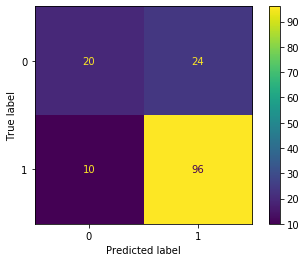

In [69]:
plot_confusion_matrix(logit_v2, X_test, y_test)

In [70]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        44
           1       0.80      0.91      0.85       106

    accuracy                           0.77       150
   macro avg       0.73      0.68      0.70       150
weighted avg       0.76      0.77      0.76       150



In [71]:
y_final_test_pred_proba = logit_v2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7774442538593481

### KNN v2

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_v2 = KNeighborsClassifier()

In [90]:
knn_v2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
y_eval_pred = knn_v2.predict(X_eval)

In [92]:
accuracy_score(y_eval, y_eval_pred)

0.74

In [93]:
# report

y_final_test_pred = knn_v2.predict(X_test)

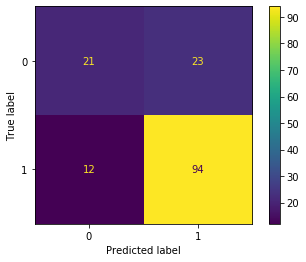

In [95]:
plot_confusion_matrix(knn_v2, X_test, y_test)

In [96]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.48      0.55        44
           1       0.80      0.89      0.84       106

    accuracy                           0.77       150
   macro avg       0.72      0.68      0.69       150
weighted avg       0.75      0.77      0.76       150



In [97]:
y_final_test_pred_proba = knn_v2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7549313893653518

### SVM v2

In [116]:
from sklearn.svm import SVC

svm_v2 = SVC(kernel='linear',probability= True)

In [117]:
svm_v2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [118]:
y_eval_pred = svm_v2.predict(X_eval)

In [119]:
accuracy_score(y_eval, y_eval_pred)

0.72

In [120]:
# report

y_final_test_pred = svm_v2.predict(X_test)

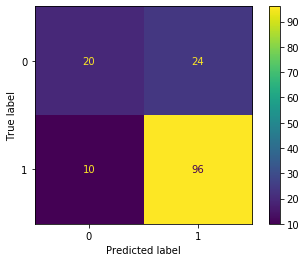

In [121]:
plot_confusion_matrix(svm_v2, X_test, y_test)

In [122]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        44
           1       0.80      0.91      0.85       106

    accuracy                           0.77       150
   macro avg       0.73      0.68      0.70       150
weighted avg       0.76      0.77      0.76       150



In [123]:
y_final_test_pred_proba = svm_v2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7790523156089194

## Version
- CV wird benutzt

In [258]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score


kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

In [215]:
######## zu 4.Version für GridSearchCV #########

### Logit v3

In [164]:
from sklearn.linear_model import LogisticRegression

logit_v3 = LogisticRegression(max_iter=1000)

In [165]:
scores = cross_validate(logit_v3, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV)

In [166]:
scores = pd.DataFrame(scores)

In [167]:
scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.019936,0.001994,0.787611,0.881188,0.831776,0.741559,0.742857
1,0.016955,0.002993,0.745763,0.926316,0.826291,0.778713,0.735714
2,0.015956,0.001995,0.796296,0.843137,0.819048,0.680857,0.728571
3,0.012965,0.001995,0.754386,0.905263,0.822967,0.781053,0.735714
4,0.016955,0.001995,0.844660,0.878788,0.861386,0.827790,0.800000


In [168]:
scores.mean()

fit_time          0.016553
score_time        0.002194
test_precision    0.785743
test_recall       0.886938
test_f1           0.832293
test_roc_auc      0.761994
test_accuracy     0.748571
dtype: float64

### KNN v3

In [188]:
from sklearn.neighbors import KNeighborsClassifier

knn_v3 = KNeighborsClassifier()

In [189]:
scores = cross_validate(knn_v3, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV)

In [190]:
scores = pd.DataFrame(scores)

In [191]:
scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.002992,0.011968,0.745763,0.871287,0.803653,0.638868,0.692857
1,0.001995,0.009987,0.734513,0.873684,0.798077,0.710409,0.700000
2,0.001981,0.009995,0.792793,0.862745,0.826291,0.667957,0.735714
3,0.001971,0.009974,0.763636,0.884211,0.819512,0.744327,0.735714
4,0.001994,0.008978,0.779661,0.929293,0.847926,0.734664,0.764286


In [192]:
scores.mean()

fit_time          0.002187
score_time        0.010180
test_precision    0.763273
test_recall       0.884244
test_f1           0.819092
test_roc_auc      0.699245
test_accuracy     0.725714
dtype: float64

### SVM v3

In [210]:
from sklearn.svm import SVC

svm_v3 = SVC(kernel='linear',probability= True)

In [211]:
scores = cross_validate(svm_v3, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV)

In [212]:
scores = pd.DataFrame(scores)

In [213]:
scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.072799,0.003990,0.780702,0.881188,0.827907,0.729881,0.735714
1,0.067846,0.003985,0.743802,0.947368,0.833333,0.773801,0.742857
2,0.062380,0.003062,0.796296,0.843137,0.819048,0.684985,0.728571
3,0.055997,0.004019,0.756757,0.884211,0.815534,0.793918,0.728571
4,0.059020,0.003958,0.818182,0.909091,0.861244,0.831239,0.792857


In [214]:
scores.mean()

fit_time          0.063609
score_time        0.003803
test_precision    0.779148
test_recall       0.892999
test_f1           0.831413
test_roc_auc      0.762765
test_accuracy     0.745714
dtype: float64

## Version

In [354]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)
from sklearn.metrics import make_scorer

### Logit v4

In [324]:
param_test_logit = {'C':np.linspace(0.1,5.0),
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

In [325]:
logit_grid = LogisticRegression(max_iter=1000)

In [291]:


#scoring = {'Precision': make_scorer(precision_score),'Recall':make_scorer(recall_score),
 #          'F1':make_scorer(f1_score),'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

#grid_model_logit = GridSearchCV(estimator = logit_grid,
#                               param_grid = param_test_logit,
#                               cv = kFoldCV,
#                               scoring = scoring,
#                               refit = 'AUC',
 #                              verbose = 2)

#### AUC

In [292]:
from sklearn.model_selection import GridSearchCV


grid_model_logit = GridSearchCV(estimator = logit_grid,
                               param_grid = param_test_logit,
                               cv = kFoldCV,
                               scoring = 'roc_auc',
                               verbose = 2,
                               n_jobs= -1)

In [293]:
grid_model_logit.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solv


[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l2, solver=lbfgs, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ................... C=0.2, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.2, penalty=l1, solver=saga ..................................
[CV] ................... C=0.2, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ... C=0.30000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l1, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l1, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear ............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ... C=0.30000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l2, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l2, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear ............

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceW

[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=saga ..................................
[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=saga ..................................
[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.4, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l2, solver=saga ..................................
[CV] ................... C=0.4, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.4, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l2, solver=saga ..................................
[CV] ................... C=0.4, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceW

[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=saga ..................................
[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=saga ..................................
[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.5, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.5, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l2, solver=saga ..................................
[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l2, solver=saga ..................................
[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.



[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.6, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l1, solver=saga ..................................
[CV] ................... C=0.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l1, solver=saga ..................................
[CV] ................... C=0.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l2, solver=saga ..................................
[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l2, solver=saga ..................................
[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=0.7000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.7000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.7000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=newton-cg ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.8, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.8, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l1, solver=saga ..................................
[CV] ................... C=0.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l1, solver=saga ..................................
[CV] ................... C=0.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l2, solver=saga ..................................
[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l2, solver=saga ..................................
[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=0.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l1, solver=saga ..................................
[CV] ................... C=0.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l1, solver=saga ..................................
[CV] ................... C=0.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.9, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.9, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l2, solver=saga ..................................
[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l2, solver=saga ..................................
[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] .............. C=1.0, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l1, solver=saga ..................................
[CV] ................... C=1.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l1, solver=saga ..................................
[CV] ................... C=1.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=1.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l1, solver=saga ..................................
[CV] ................... C=1.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l1, solver=saga ..................................
[CV] ................... C=1.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=1.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l2, solver=saga ..................................
[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l2, solver=saga ..................................
[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=newton-cg ..............
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.2000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.2000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=newton-cg ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=newton-cg ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=saga ..................................
[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=saga ..................................
[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=1.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.6, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l2, solver=saga ..................................
[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l2, solver=saga ..................................
[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=1.7000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.7000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.7000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=newton-cg ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=1.9000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.9000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.9000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=newton-cg ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=saga ..................................
[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=saga ..................................
[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=2.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.0, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l2, solver=saga ..................................
[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l2, solver=saga ..................................
[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=2.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l1, solver=saga ..................................
[CV] ................... C=2.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l1, solver=saga ..................................
[CV] ................... C=2.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=2.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l2, solver=saga ..................................
[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l2, solver=saga ..................................
[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................
[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................
[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=newton-cg .............................
[CV] .............. C=2.2, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.2, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l2, solver=saga ..................................
[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l2, solver=saga ..................................
[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=2.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=2.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l1, solver=saga ..................................
[CV] ................... C=2.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l1, solver=saga ..................................
[CV] ................... C=2.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=2.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.6, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l2, solver=saga ..................................
[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l2, solver=saga ..................................
[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=saga ..................................
[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=saga ..................................
[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=newton-cg .............................
[CV] .............. C=2.7, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.7, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l2, solver=saga ..................................
[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l2, solver=saga ..................................
[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=saga ..................................
[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=saga ..................................
[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l2, solver=saga ..................................
[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l2, solver=saga ..................................
[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=3.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l1, solver=saga ..................................
[CV] ................... C=3.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l1, solver=saga ..................................
[CV] ................... C=3.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.2, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.2, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l2, solver=saga ..................................
[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l2, solver=saga ..................................
[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=3.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=saga ..................................
[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=saga ..................................
[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.6, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l2, solver=saga ..................................
[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l2, solver=saga ..................................
[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=saga ..................................
[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=saga ..................................
[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.7, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.7, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l2, solver=saga ..................................
[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l2, solver=saga ..................................
[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l1, solver=saga ..................................
[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l1, solver=saga ..................................
[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.2s
[CV] C=4.0, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.0, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l2, solver=saga ..................................
[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l2, solver=saga ..................................
[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l1, solver=saga ..................................
[CV] ................... C=4.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l1, solver=saga ..................................
[CV] ................... C=4.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l2, solver=saga ..................................
[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l2, solver=saga ..................................
[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=saga ..................................
[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=saga ..................................
[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.2, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.2, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l2, solver=saga ..................................
[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l2, solver=saga ..................................
[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=saga ..................................
[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=saga ..................................
[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.3, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.3, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l2, solver=saga ..................................
[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l2, solver=saga ..................................
[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=newton-cg ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=saga ..................................
[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=saga ..................................
[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.5, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.5, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l2, solver=saga ..................................
[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l2, solver=saga ..................................
[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l1, solver=saga ..................................
[CV] ................... C=4.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l1, solver=saga ..................................
[CV] ................... C=4.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l2, solver=saga ..................................
[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l2, solver=saga ..................................
[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................
[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................
[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.7, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.7, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l2, solver=saga ..................................
[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l2, solver=saga ..................................
[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l1, solver=saga ..................................
[CV] ................... C=4.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l1, solver=saga ..................................
[CV] ................... C=4.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.8, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.8, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l2, solver=saga ..................................
[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l2, solver=saga ..................................
[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=4.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l1, solver=saga ..................................
[CV] ................... C=4.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l1, solver=saga ..................................
[CV] ................... C=4.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.9, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.9, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l2, solver=saga ..................................
[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l2, solver=saga ..................................
[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=saga ..................................
[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=saga ..................................
[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=5.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=5.0, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l2, solver=saga ..................................
[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l2, solver=saga ..................................
[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l2, solver=liblinear, total=   0.0s


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:  1.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=N...
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 

In [297]:
grid_model_logit.best_estimator_

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [298]:
#best params for auc

grid_model_logit.best_params_

{'C': 0.2, 'penalty': 'l1', 'solver': 'saga'}

In [299]:
#best score for auc

grid_model_logit.best_params_, grid_model_logit.best_score_

({'C': 0.2, 'penalty': 'l1', 'solver': 'saga'}, 0.7688495576257943)

In [301]:
# pd.DataFrame(grid_model_logit.cv_results_)

In [302]:
#report 

y_final_test_pred = grid_model_logit.predict(X_test)


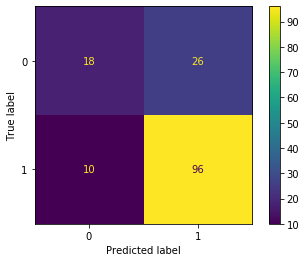

In [303]:
plot_confusion_matrix(grid_model_logit, X_test, y_test)

In [304]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.41      0.50        44
           1       0.79      0.91      0.84       106

    accuracy                           0.76       150
   macro avg       0.71      0.66      0.67       150
weighted avg       0.74      0.76      0.74       150



In [305]:
y_final_test_pred_proba = grid_model_logit.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7703687821612352

#### F1

In [327]:
from sklearn.model_selection import GridSearchCV


grid_model_logit = GridSearchCV(estimator = logit_grid,
                               param_grid = param_test_logit,
                               cv = kFoldCV,
                               scoring = 'f1',
                               verbose = 2,
                               n_jobs= -1)

In [328]:
grid_model_logit.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   13.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4

In [329]:
grid_model_logit.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
#best params for f1

grid_model_logit.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [331]:
#best score for f1

grid_model_logit.best_params_, grid_model_logit.best_score_

({'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.8454828790876168)

In [332]:
#report 

y_final_test_pred = grid_model_logit.predict(X_test)

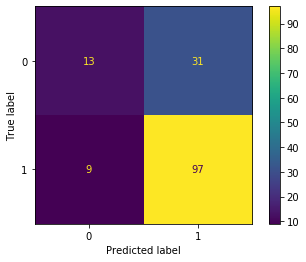

In [333]:
plot_confusion_matrix(grid_model_logit, X_test, y_test)

In [334]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.30      0.39        44
           1       0.76      0.92      0.83       106

    accuracy                           0.73       150
   macro avg       0.67      0.61      0.61       150
weighted avg       0.71      0.73      0.70       150



In [335]:
y_final_test_pred_proba = grid_model_logit.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7560034305317325

### KNN v4

#### F1

In [369]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [356]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [357]:
knn_grid = KNeighborsClassifier()

In [360]:
from sklearn.model_selection import GridSearchCV


grid_model_knn = GridSearchCV(estimator = knn_grid,
                               param_grid = param_test_knn,
                               cv = kFoldCV,
                               scoring = 'f1',
                               verbose = 2,
                               n_jobs= -1)

In [361]:
grid_model_knn.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [362]:
grid_model_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')

In [363]:
#best params for f1

grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [364]:
#report 

y_final_test_pred = grid_model_knn.predict(X_test)

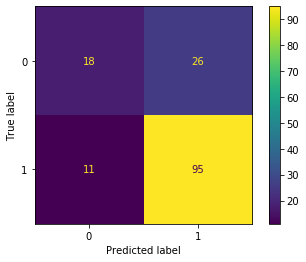

In [365]:
plot_confusion_matrix(grid_model_knn, X_test, y_test)

In [367]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.41      0.49        44
           1       0.79      0.90      0.84       106

    accuracy                           0.75       150
   macro avg       0.70      0.65      0.67       150
weighted avg       0.74      0.75      0.74       150



In [368]:
y_final_test_pred_proba = grid_model_knn.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.781303602058319

### SVM v4

#### F1

In [387]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

from sklearn.svm import SVC



In [388]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

In [389]:
svc_grid = SVC(probability = True, max_iter = 2000)

In [391]:
from sklearn.model_selection import GridSearchCV


grid_model_svc = GridSearchCV(estimator = svc_grid,
                               param_grid = param_test_svc,
                               cv = kFoldCV,
                               scoring = 'f1',
                               verbose = 2,
                               n_jobs= -1)

In [392]:
grid_model_svc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=2000,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [393]:
grid_model_svc.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=2000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [394]:
#best params for f1

grid_model_svc.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [395]:
#report 

y_final_test_pred = grid_model_svc.predict(X_test)

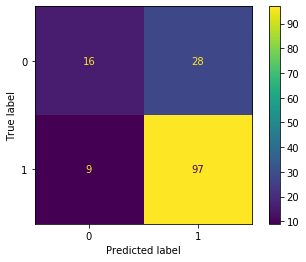

In [396]:
plot_confusion_matrix(grid_model_svc, X_test, y_test)

In [397]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.36      0.46        44
           1       0.78      0.92      0.84       106

    accuracy                           0.75       150
   macro avg       0.71      0.64      0.65       150
weighted avg       0.74      0.75      0.73       150



In [398]:
y_final_test_pred_proba = grid_model_svc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7832332761578045